In [1]:
import os
import numpy as np
import librosa
import soundfile as sf
import scipy.io.wavfile as wav
from scipy.io.wavfile import read, write
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
os.listdir("./NguyenAmHuanLuyen-16k/")

['23MTL',
 '24FTL',
 '25MLM',
 '27MCM',
 '28MVN',
 '29MHN',
 '30FTN',
 '32MTP',
 '33MHP',
 '34MQP',
 '35MMQ',
 '36MAQ',
 '37MDS',
 '38MDS',
 '39MTS',
 '40MHS',
 '41MVS',
 '42FQT',
 '43MNT',
 '44MTT',
 '45MDV']

In [2]:
Fs = 16000 # Tần số lấy mẫu của audio, luôn là 16000
char = ['a','e','i','o','u']
#Tham số 
NFFT = 512 # độ dài vector FFT
# frame_size = (int)(Fs*0.03) # Kích thước một frame
# hop_size = (int)(Fs*0.02) # Kích thước một bước nhảy
frame_size = int(20 * Fs / 1000)  # Frame length in samples
hop_size = int(10 * Fs / 1000)  # Frame step in samples
training_path = "./trimmed-NguyenAmHuanLuyen-16k" # đường dẫn đến file training
testing_path = "./trimmed-NguyenAmKiemThu-16k"    # đường dẫn đến file test

In [15]:
def calculate_ma(frame):

    # Tính Short-Time Energy (STE) cho một frame
    return np.linalg.norm(frame)

In [16]:
def trim_silence_at_ends(audio, frame_length=0.025, min_silence=0.1):
    # Tính toán kích thước frame và số lượng frame
    frame_size = int(frame_length * Fs)
    num_frames = len(audio) // frame_size

    # Tính STE cho từng frame
    MAs = np.array([calculate_ma(audio[i*frame_size:(i+1)*frame_size]) for i in range(num_frames)])

    # Xác định ngưỡng để phát hiện âm thanh yên tĩnh
    avg_MA = np.average(MAs)
    threshold = 0.3 * avg_MA

    # Xác định frame yên tĩnh ở đầu file
    start_index = 0
    while MAs[start_index] < threshold:
        start_index += 1

    # Xác định frame yên tĩnh ở cuối file
    end_index = num_frames - 1
    while MAs[end_index] < threshold:
        end_index -= 1

    # Lấy khoảng âm thanh không yên tĩnh
    trimmed_audio = audio[start_index*frame_size:(end_index+1)*frame_size]

    return trimmed_audio

In [17]:
def signal_trimming(file_path, trim_silence=True, frame_length=0.025, min_silence=0.1):
    # Load audio file
    audio, sample_rate = librosa.load(file_path, sr=None)

    # Loại bỏ khoảng yên tĩnh ở đầu và cuối nếu cần
    if trim_silence:
        audio = trim_silence_at_ends(audio, frame_length, min_silence)

    return audio, sample_rate

In [18]:
def browse_files(signal_path, output_path):
    for file in sorted(os.listdir(signal_path)):
        sub_path = os.path.join(signal_path, file)
        sub_output_path = os.path.join(output_path, file)

        # Tạo thư mục đầu ra nếu nó chưa tồn tại
        os.makedirs(sub_output_path, exist_ok=True)

        for sub_file in sorted(os.listdir(sub_path)):
            exact_input_path = os.path.join(sub_path, sub_file)
            exact_output_path = os.path.join(sub_output_path, sub_file)

            # Lấy âm thanh đã được trim, mặc định là trim cả yên tĩnh ở đầu và cuối
            trimmed_audio, sample_rate = signal_trimming(exact_input_path)

            # Ghi âm thanh đã được trim ra file đầu ra
            sf.write(exact_output_path, trimmed_audio, sample_rate)
            print(exact_output_path)

In [19]:
main_path = "./NguyenAmHuanLuyen-16k"

# Đường dẫn thư mục đầu ra
output_path = "./trimmed-NguyenAmHuanLuyen-16k"

paths = [["./NguyenAmHuanLuyen-16k","./trimmed-NguyenAmHuanLuyen-16k"],["./NguyenAmKiemThu-16k","./trimmed-NguyenAmKiemThu-16k"]]
# # Đường dẫn của thư mục chứa 21 tập folder
# main_path = "D:/last_hope/NguyenAmHuanLuyen-16k"

# # Đường dẫn thư mục đầu ra
# output_path = "D:/last_hope/trimmed-NguyenAmHuanLuyen-16k"
# Xử lý trên toàn bộ cây thư mục
for i in paths:
    browse_files(i[0], i[1])

./trimmed-NguyenAmHuanLuyen-16k\23MTL\a.wav
./trimmed-NguyenAmHuanLuyen-16k\23MTL\e.wav
./trimmed-NguyenAmHuanLuyen-16k\23MTL\i.wav
./trimmed-NguyenAmHuanLuyen-16k\23MTL\o.wav
./trimmed-NguyenAmHuanLuyen-16k\23MTL\u.wav
./trimmed-NguyenAmHuanLuyen-16k\24FTL\a.wav
./trimmed-NguyenAmHuanLuyen-16k\24FTL\e.wav
./trimmed-NguyenAmHuanLuyen-16k\24FTL\i.wav
./trimmed-NguyenAmHuanLuyen-16k\24FTL\o.wav
./trimmed-NguyenAmHuanLuyen-16k\24FTL\u.wav
./trimmed-NguyenAmHuanLuyen-16k\25MLM\a.wav
./trimmed-NguyenAmHuanLuyen-16k\25MLM\e.wav
./trimmed-NguyenAmHuanLuyen-16k\25MLM\i.wav
./trimmed-NguyenAmHuanLuyen-16k\25MLM\o.wav
./trimmed-NguyenAmHuanLuyen-16k\25MLM\u.wav
./trimmed-NguyenAmHuanLuyen-16k\27MCM\a.wav
./trimmed-NguyenAmHuanLuyen-16k\27MCM\e.wav
./trimmed-NguyenAmHuanLuyen-16k\27MCM\i.wav
./trimmed-NguyenAmHuanLuyen-16k\27MCM\o.wav
./trimmed-NguyenAmHuanLuyen-16k\27MCM\u.wav
./trimmed-NguyenAmHuanLuyen-16k\28MVN\a.wav
./trimmed-NguyenAmHuanLuyen-16k\28MVN\e.wav
./trimmed-NguyenAmHuanLuyen-16k\

In [20]:
def Divide(audio):
    length = len(audio)
    part_len = length // 3
    audio = audio[part_len+1:part_len*2]
    return audio

In [21]:
def normalize_signal(audio_signal):
    # Find the maximum absolute value in the signal
    max_val = np.max(np.abs(audio_signal))

    # Normalize the signal to the range of -1 to 1
    normalized_signal = audio_signal / max_val

    return normalized_signal

In [22]:
def ReadFileByName(inputPath, r):
    audios = []
    # trả về danh sách các bản ghi âm đã cắt của ký tự char[r]
    for dirs in sorted(os.listdir(inputPath)):
        sub_path = os.path.join(inputPath, dirs)
        for files in sorted(os.listdir(sub_path)):
            if(files[0]!=char[r]):
                continue
            audio_path = os.path.join(sub_path, files)
            # print(audio_file)
            audio, fs = librosa.load(audio_path)
            # Tách audio và thêm vào danh sách audios
            # nor_audio = normalize_signal(audio_signal=audio)
            audios.append((audio))
    return audios

In [139]:
def cal_mfccs(audio,avr =True): #lấy giá trị vector FFT của một audio
    # middle_part = TrimPart(audio=audio)
    frames = librosa.util.frame(audio, frame_length=frame_size, hop_length=hop_size)
    fft_frames = librosa.feature.mfcc(y=frames,sr=Fs, n_mfcc=13) # hiện tại một cột là một vector
    res = fft_frames
    res = np.abs(res)#lấy biên độ là số dương
    if avr:
        res = np.mean(res,axis=0)
        return res
    else:
        return res

In [142]:
def cal_feature(audios,avr = True):
    # trích xuất đặc trưng từ danh sách các audio
    # lấy trung bình
    fts = [] #mảng hai chiều chứa thông tin các vector 
    for audio in audios:
        fts.append(cal_mfccs(audio,avr=avr))
    fts = np.array(fts)
    if (len(fts)!=21): print(len(fts))
    if avr:
        feature = np.mean(fts,axis = 0)
        return feature
    else:
        return fts    


In [36]:
features = [] # Kết quả , features[0] tương ứng vector FFT(ndarray) của chữ a, 1 của e,...
for i in range(0,5):
    # if (i!=1): continue
    audios = ReadFileByName(training_path,i)
    features.append(cal_feature(audios))
# print(features)
# for i in range(0,5):
#     print(char[i],": ",features[i])

print(np.array(features[1]).flatten())

d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=54
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=57
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=50
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=64
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=136
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=319
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=112
  warnings.warn(
d:\

[227.66695    20.164682   14.719616   13.250325   12.565171   12.021971
  10.839652   10.245134   10.6460705   8.991888    8.097502    7.559562
   6.9890246]


d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=30
  warnings.warn(


(13,)
(13,)
(13,)
(13,)
(13,)


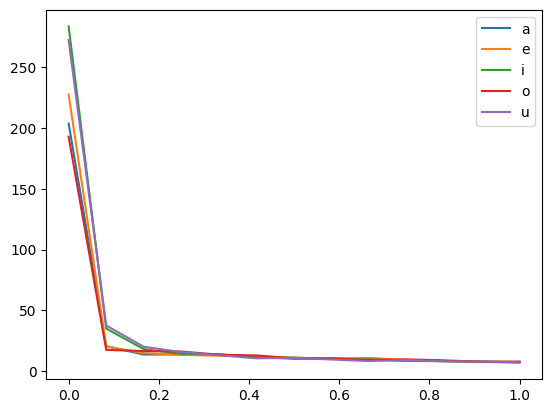

In [43]:
x = np.linspace(0,1,13)
for i in range(0,5):
    flat_data = np.array(features[i]).flatten()
    print(flat_data.shape)
    plt.plot(x,flat_data,label=char[i])
plt.legend()
plt.show()

In [30]:
def predict_audio_label(audio, known_features, target_labels):
    min_distance = float('inf')
    predicted_label = None
    # Tính đặc trưng của file kiểm tra
    test_feature = cal_mfccs(audio)
    # So sánh với đặc trưng đã biết
    for label, feature in zip(target_labels, known_features):
        distance = np.linalg.norm(test_feature - feature)
        if distance < min_distance:
            min_distance = distance
            predicted_label = label
    return predicted_label

In [31]:
def evaluate_testing_set(testing_path, known_features, target_labels):
    correct_predictions = 0
    total_files = 0
    pred = []
    # Duyệt qua từng file trong tập kiểm tra
    for dirs in sorted(os.listdir(testing_path)):
        sub_path = os.path.join(testing_path, dirs)
        for file_name in sorted(os.listdir(sub_path)):
            file_path = os.path.join(sub_path, file_name)
            true_label = file_name[0]  # Giả định nhãn đúng là ký tự đầu tiên trong tên file
            audio, fs = librosa.load(file_path)
            # Dự đoán nhãn và kiểm tra
            predicted_label = predict_audio_label(audio, known_features, target_labels)
            pred.append(predicted_label)
            print(sub_path)
            # print(f"File: {file_name} - True: {true_label}, Predicted: {predicted_label}")
            correct_predictions += true_label == predicted_label
            total_files += 1
    # Tính tỷ lệ chính xác
    accuracy = (correct_predictions / total_files) * 100
    print(f"Accuracy: {accuracy:.2f}%")
    return pred

In [46]:
target_labels = char  # ['a', 'e', 'i', 'o', 'u']
# Đánh giá tập kiểm tra
pred = evaluate_testing_set(testing_path, features, target_labels)

d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=47
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=40
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=36
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=33
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=61
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=67
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=57
  warnings.warn(
d:\pyt

./trimmed-NguyenAmKiemThu-16k\01MDA
./trimmed-NguyenAmKiemThu-16k\01MDA
./trimmed-NguyenAmKiemThu-16k\01MDA
./trimmed-NguyenAmKiemThu-16k\01MDA
./trimmed-NguyenAmKiemThu-16k\01MDA
./trimmed-NguyenAmKiemThu-16k\02FVA
./trimmed-NguyenAmKiemThu-16k\02FVA
./trimmed-NguyenAmKiemThu-16k\02FVA
./trimmed-NguyenAmKiemThu-16k\02FVA
./trimmed-NguyenAmKiemThu-16k\02FVA
./trimmed-NguyenAmKiemThu-16k\03MAB
./trimmed-NguyenAmKiemThu-16k\03MAB
./trimmed-NguyenAmKiemThu-16k\03MAB
./trimmed-NguyenAmKiemThu-16k\03MAB
./trimmed-NguyenAmKiemThu-16k\03MAB
./trimmed-NguyenAmKiemThu-16k\04MHB
./trimmed-NguyenAmKiemThu-16k\04MHB
./trimmed-NguyenAmKiemThu-16k\04MHB
./trimmed-NguyenAmKiemThu-16k\04MHB
./trimmed-NguyenAmKiemThu-16k\04MHB
./trimmed-NguyenAmKiemThu-16k\05MVB
./trimmed-NguyenAmKiemThu-16k\05MVB
./trimmed-NguyenAmKiemThu-16k\05MVB
./trimmed-NguyenAmKiemThu-16k\05MVB
./trimmed-NguyenAmKiemThu-16k\05MVB


d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=295
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=181
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=71
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=123
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=126
  warnings.warn(


./trimmed-NguyenAmKiemThu-16k\06FTB
./trimmed-NguyenAmKiemThu-16k\06FTB
./trimmed-NguyenAmKiemThu-16k\06FTB
./trimmed-NguyenAmKiemThu-16k\06FTB
./trimmed-NguyenAmKiemThu-16k\06FTB
./trimmed-NguyenAmKiemThu-16k\07FTC
./trimmed-NguyenAmKiemThu-16k\07FTC
./trimmed-NguyenAmKiemThu-16k\07FTC
./trimmed-NguyenAmKiemThu-16k\07FTC
./trimmed-NguyenAmKiemThu-16k\07FTC
./trimmed-NguyenAmKiemThu-16k\08MLD
./trimmed-NguyenAmKiemThu-16k\08MLD
./trimmed-NguyenAmKiemThu-16k\08MLD
./trimmed-NguyenAmKiemThu-16k\08MLD


d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=202
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=188
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=92
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=174
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=88
  warnings.warn(


./trimmed-NguyenAmKiemThu-16k\08MLD
./trimmed-NguyenAmKiemThu-16k\09MPD
./trimmed-NguyenAmKiemThu-16k\09MPD
./trimmed-NguyenAmKiemThu-16k\09MPD
./trimmed-NguyenAmKiemThu-16k\09MPD
./trimmed-NguyenAmKiemThu-16k\09MPD
./trimmed-NguyenAmKiemThu-16k\10MSD
./trimmed-NguyenAmKiemThu-16k\10MSD
./trimmed-NguyenAmKiemThu-16k\10MSD
./trimmed-NguyenAmKiemThu-16k\10MSD
./trimmed-NguyenAmKiemThu-16k\10MSD
./trimmed-NguyenAmKiemThu-16k\11MVD


d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=133
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=195
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=157
  warnings.warn(


./trimmed-NguyenAmKiemThu-16k\11MVD
./trimmed-NguyenAmKiemThu-16k\11MVD
./trimmed-NguyenAmKiemThu-16k\11MVD
./trimmed-NguyenAmKiemThu-16k\11MVD
./trimmed-NguyenAmKiemThu-16k\12FTD
./trimmed-NguyenAmKiemThu-16k\12FTD
./trimmed-NguyenAmKiemThu-16k\12FTD
./trimmed-NguyenAmKiemThu-16k\12FTD
./trimmed-NguyenAmKiemThu-16k\12FTD
./trimmed-NguyenAmKiemThu-16k\14FHH
./trimmed-NguyenAmKiemThu-16k\14FHH
./trimmed-NguyenAmKiemThu-16k\14FHH
./trimmed-NguyenAmKiemThu-16k\14FHH


d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=64
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=209
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=284
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=119
  warnings.warn(


./trimmed-NguyenAmKiemThu-16k\14FHH
./trimmed-NguyenAmKiemThu-16k\15MMH
./trimmed-NguyenAmKiemThu-16k\15MMH
./trimmed-NguyenAmKiemThu-16k\15MMH
./trimmed-NguyenAmKiemThu-16k\15MMH
./trimmed-NguyenAmKiemThu-16k\15MMH
./trimmed-NguyenAmKiemThu-16k\16FTH
./trimmed-NguyenAmKiemThu-16k\16FTH
./trimmed-NguyenAmKiemThu-16k\16FTH
./trimmed-NguyenAmKiemThu-16k\16FTH
./trimmed-NguyenAmKiemThu-16k\16FTH
./trimmed-NguyenAmKiemThu-16k\17MTH
./trimmed-NguyenAmKiemThu-16k\17MTH
./trimmed-NguyenAmKiemThu-16k\17MTH
./trimmed-NguyenAmKiemThu-16k\17MTH
./trimmed-NguyenAmKiemThu-16k\17MTH
./trimmed-NguyenAmKiemThu-16k\18MNK
./trimmed-NguyenAmKiemThu-16k\18MNK
./trimmed-NguyenAmKiemThu-16k\18MNK
./trimmed-NguyenAmKiemThu-16k\18MNK
./trimmed-NguyenAmKiemThu-16k\18MNK
./trimmed-NguyenAmKiemThu-16k\19MXK
./trimmed-NguyenAmKiemThu-16k\19MXK
./trimmed-NguyenAmKiemThu-16k\19MXK
./trimmed-NguyenAmKiemThu-16k\19MXK
./trimmed-NguyenAmKiemThu-16k\19MXK
./trimmed-NguyenAmKiemThu-16k\20MVK


d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=78
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=150
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=30
  warnings.warn(


./trimmed-NguyenAmKiemThu-16k\20MVK
./trimmed-NguyenAmKiemThu-16k\20MVK
./trimmed-NguyenAmKiemThu-16k\20MVK
./trimmed-NguyenAmKiemThu-16k\20MVK
./trimmed-NguyenAmKiemThu-16k\21MTL
./trimmed-NguyenAmKiemThu-16k\21MTL
./trimmed-NguyenAmKiemThu-16k\21MTL
./trimmed-NguyenAmKiemThu-16k\21MTL
./trimmed-NguyenAmKiemThu-16k\21MTL
./trimmed-NguyenAmKiemThu-16k\22MHL
./trimmed-NguyenAmKiemThu-16k\22MHL
./trimmed-NguyenAmKiemThu-16k\22MHL
./trimmed-NguyenAmKiemThu-16k\22MHL
./trimmed-NguyenAmKiemThu-16k\22MHL
Accuracy: 30.48%


In [13]:
def get_true_label():
    labels = []
    for subs,_,files in os.walk("./NguyenAmKiemThu-16k"):
        for file in files:
            file_path = os.path.join(subs, file)
            label = file_path.split("\\")[-1].split(".")[0]
            labels.append(label)

    return labels
lbs = get_true_label()


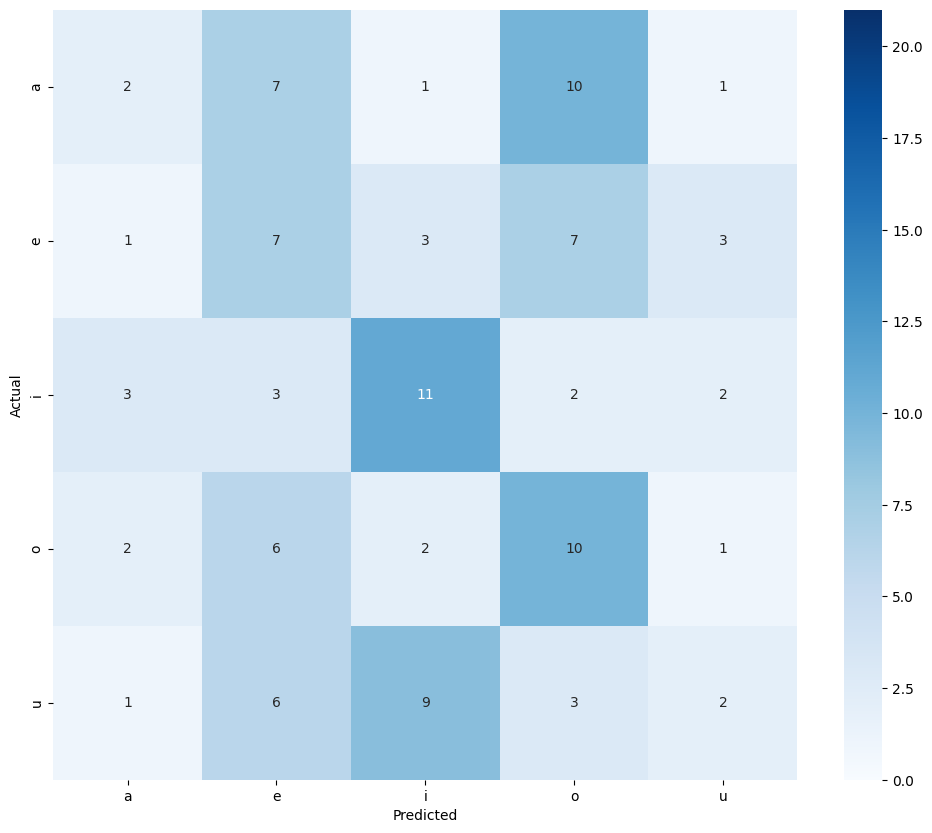

In [27]:



cm = confusion_matrix(lbs, y_pred=pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d",vmin=0.0, vmax=21, cmap="Blues", cbar=True,
            xticklabels=np.unique(lbs), yticklabels=np.unique(pred))
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
plt.show()

d:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[192.84963989  17.34904861  16.39594269  16.0087738   13.39996529
   12.77142048  10.35312748  10.27732182   9.16722488   9.56130695
    8.70845318   7.57979918   7.78981733]
 [272.5039978   37.45594406  19.89490318  15.57120323  12.92408657
   10.44827175  10.74984074   9.42325878   8.19085026   9.00583839
    8.00349522   7.70409155   7.065907  ]
 [227.66694641  20.16468239  14.71961594  13.2503252   12.56517124
   12.02197075  10.83965206  10.24513435  10.64607048   8.99188805
    8.09750175   7.55956221   6.98902464]
 [283.66110229  34.89684296  17.97097397  14.03869438  13.77997017
   11.10899639  10.98543262  10.06579781   9.38016891   8.36865902
    7.98309612   7.89340305   7.21190596]
 [203.7384491   20.42458344  13.51449394  13.65461636  13.50641346
   11.45609283  10.06934357  10.30670834   9.75053024   8.44127655
    8.23011875   7.32997227   7.25243568]]


In [152]:
fts_kmean = [] # Kết quả , features[0] tương ứng vector FFT(ndarray) của chữ a, 1 của e,...
for i in range(0,5):
    # if (i!=1): continue
    audios = ReadFileByName(training_path,i)
    fts_kmean.append(cal_feature(audios,avr=False))
# len([np.array(i).flatten() for i in  fts_kmean][0])

d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=54
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=57
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=50
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=64
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=136
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=319
  warnings.warn(
d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=112
  warnings.warn(
d:\

In [153]:
from sklearn.cluster import KMeans

# fts = [np.array(i).flatten() for i in fts_kmean]
kmean_fts = []
for i in range(0,5):
    kmean = KMeans(n_clusters=5,random_state=42).fit(fts_kmean[i])
    kmean_fts.append(kmean.cluster_centers_)

ValueError: Found array with dim 4. KMeans expected <= 2.

In [86]:
# print(kmean_fts[0])

[[ 11.161383]
 [203.73845 ]]


In [149]:
a,rate = librosa.load("./trimmed-NguyenAmKiemThu-16k/02FVA/u.wav")

a_fts = cal_mfccs(a)
a_fts_t = np.array(a_fts).flatten()

for i in range(0,5):
    print(np.linalg.norm((np.array(kmean_fts[i]) - a_fts_t)))




895.79114
955.2206
1106.3289
871.6085
1071.6394


d:\python\Lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=50
  warnings.warn(


In [105]:
euclidean_distances(X=np.array(kmean_fts[0]),Y=a_fts_t)

array([[1.9329822e+02, 3.2198044e+01, 3.5797367e+00, 3.5398483e-02,
        1.9346466e+00, 1.5398960e+00, 3.4688296e+00, 3.7409968e+00,
        2.0879784e+00, 4.7357225e+00, 4.1077404e+00, 5.2119026e+00,
        3.3454180e+00],
       [7.2116089e-01, 1.6037901e+02, 1.8899733e+02, 1.9254167e+02,
        1.9064241e+02, 1.9411696e+02, 1.9604590e+02, 1.9631805e+02,
        1.9466505e+02, 1.9731279e+02, 1.9668481e+02, 1.9778897e+02,
        1.9592249e+02]], dtype=float32)